In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Forward (Explicit) Euler
def forward_euler(h, t, V0):
    V = np.zeros_like(t)
    V[0] = V0
    for i in range(1, len(t)):
        V[i] = V[i-1] + h * diff_eq(V[i-1], t[i-1])
    return V

In [3]:
# Heun (2nd Order)
def heun(h, t, V0):
    V = np.zeros_like(t)
    V[0] = V0
    for i in range(1, len(t)):
        k1 = h * diff_eq(V[i-1], t[i-1])
        k2 = h * diff_eq(V[i-1] + k1, t[i])
        V[i] = V[i-1] + 0.5 * (k1 + k2)
    return V

In [4]:
# Exponential Euler (1st Order)
def exp_euler(h, t, V0):
    V = np.zeros_like(t)
    V[0] = V0
    for i in range(1, len(t)):
        k1 = h * diff_eq(V[i-1], t[i-1])
        V[i] = V[i-1] + k1 * np.exp(-h)
    return V

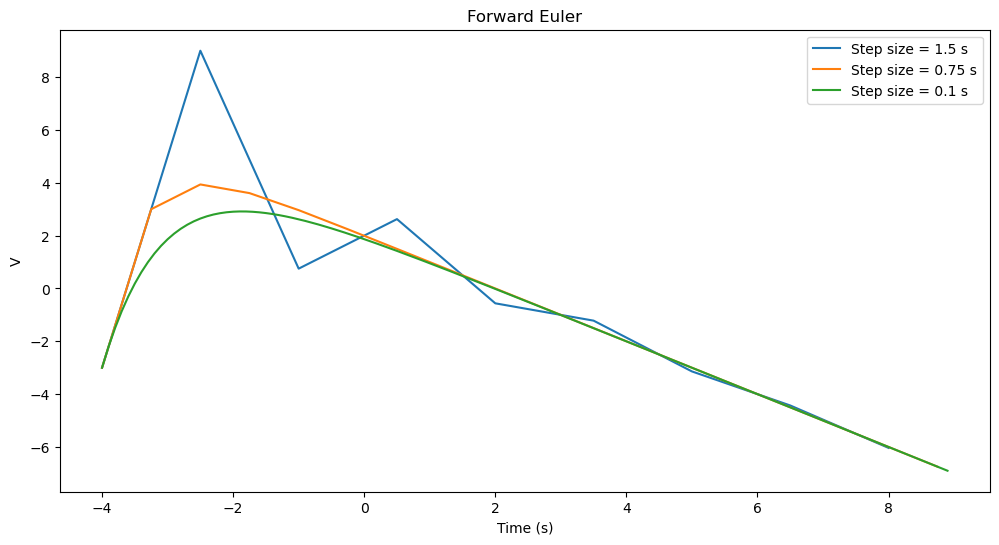

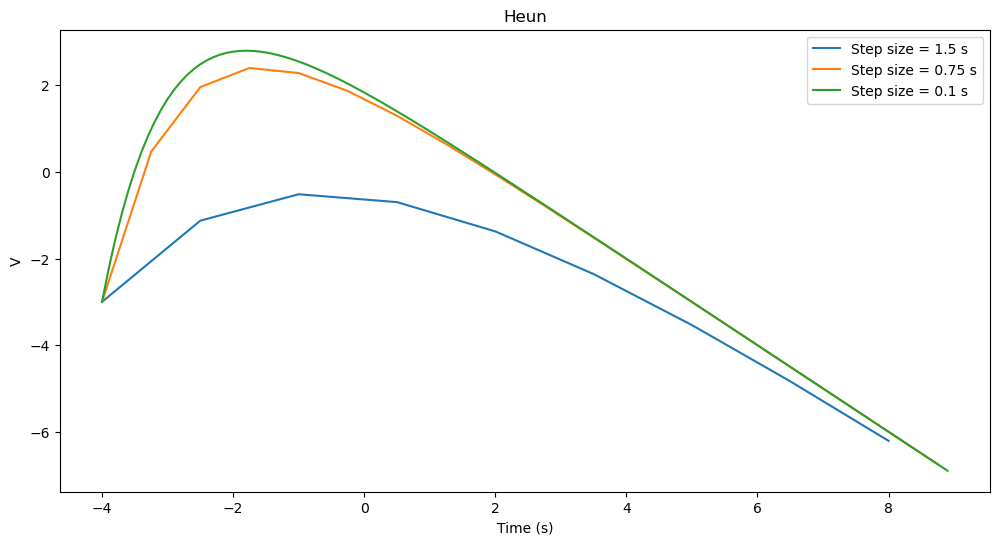

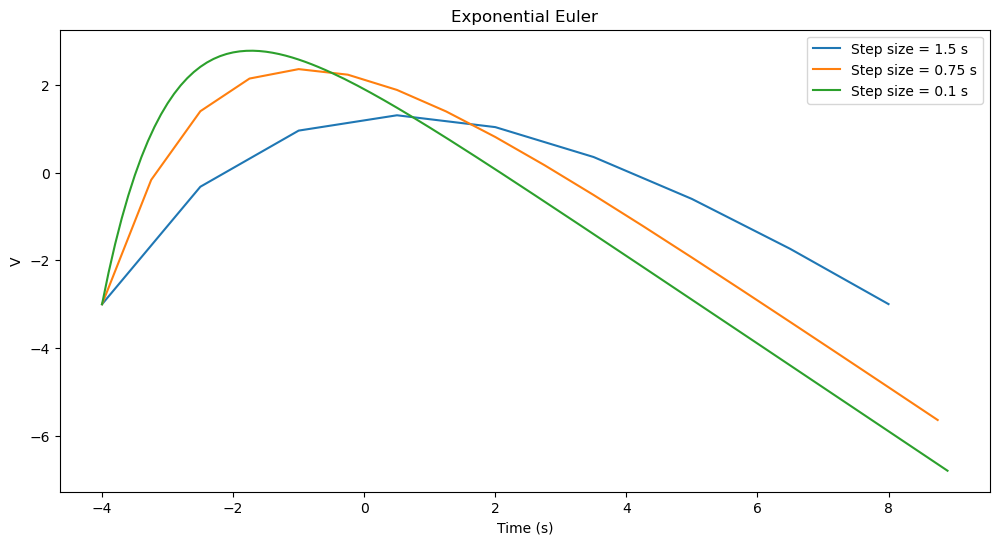

In [5]:
def diff_eq(V, t):
    return 1 - V - t

# Initial condition
V0 = -3

# Time array and step sizes
t_end = 9
step_sizes = [1.5, 0.75, 0.1]

# Solve and plot
solvers = [forward_euler, heun, exp_euler]
solver_names = ['Forward Euler', 'Heun', 'Exponential Euler']

for solver, name in zip(solvers, solver_names):
    plt.figure(figsize=(12, 6))
    for h in step_sizes:
        t = np.arange(-4, t_end, h)
        V = solver(h, t, V0)
        plt.plot(t, V, label=f'Step size = {h} s')
    plt.title(name)
    plt.xlabel('Time (s)')
    plt.ylabel('V')
    plt.legend()
    plt.show()

In [6]:
# Constants
Cm = 1e-6  # cell membrane capacitance
gleak = 100e-6  # cell membrane leak conductivity
Vrest = -60e-3  # cell membrane resting voltage
Vthr = -20e-3  # cell membrane spiking threshold voltage
Vspike = 20e-3  # spike voltage
dt = 25e-6  # time step
t = np.arange(0, 50e-3, dt)  # time array

# Input currents
Iinput1 = 10e-6 * np.abs(np.sin(2 * np.pi * 50 * t))  # rectified 50Hz sine with 10 µA amplitude
Iinput2 = 30e-6 * np.abs(np.sin(2 * np.pi * 50 * t))  # rectified 50Hz sine with 30 µA amplitude

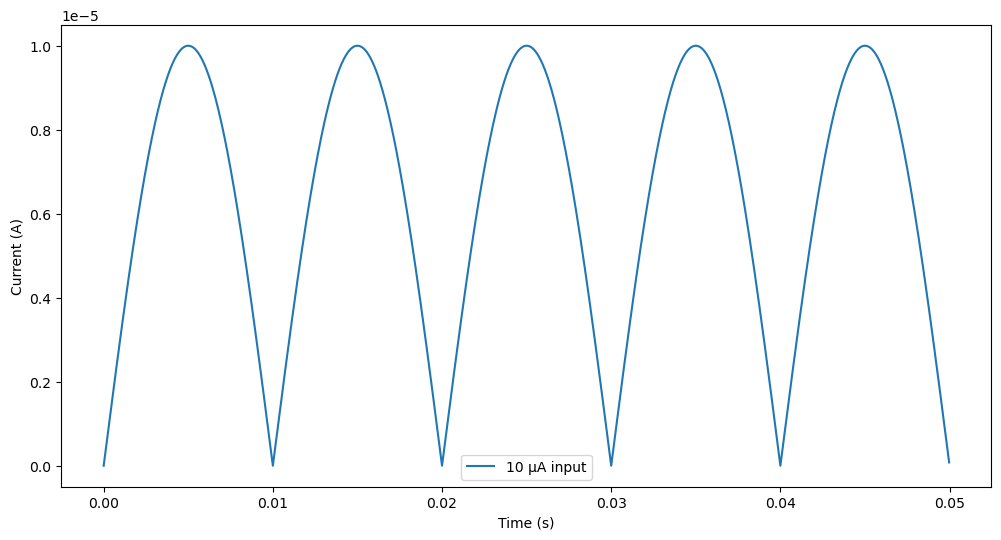

In [7]:
# Plot for 10 µA input current
plt.figure(figsize=(12, 6))
plt.plot(t, Iinput1, label='10 µA input')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.show()

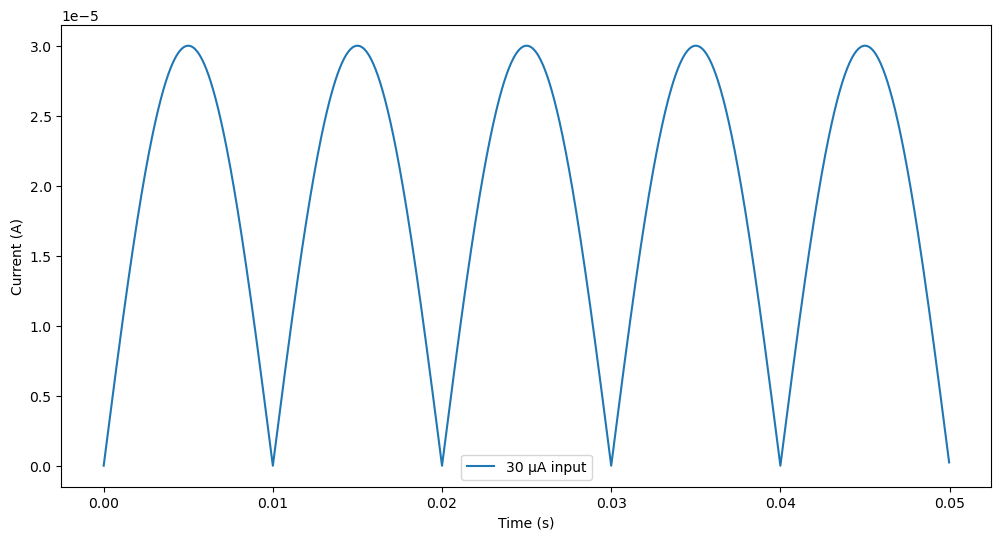

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(t, Iinput2, label='30 µA input')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()

In [9]:
# LIF neuron model
def lif_neuron(Iinput):
    V = np.zeros_like(t)  # membrane voltage array
    V[0] = Vrest  # initial condition
    for i in range(1, t.size):
        if V[i-1] < Vthr:
            V[i] = V[i-1] + dt/Cm * (-gleak*(V[i-1] - Vrest) + Iinput[i-1])
        elif Vthr <= V[i-1] < Vspike:
            V[i] = Vspike
        else:
            V[i] = Vrest
    return V

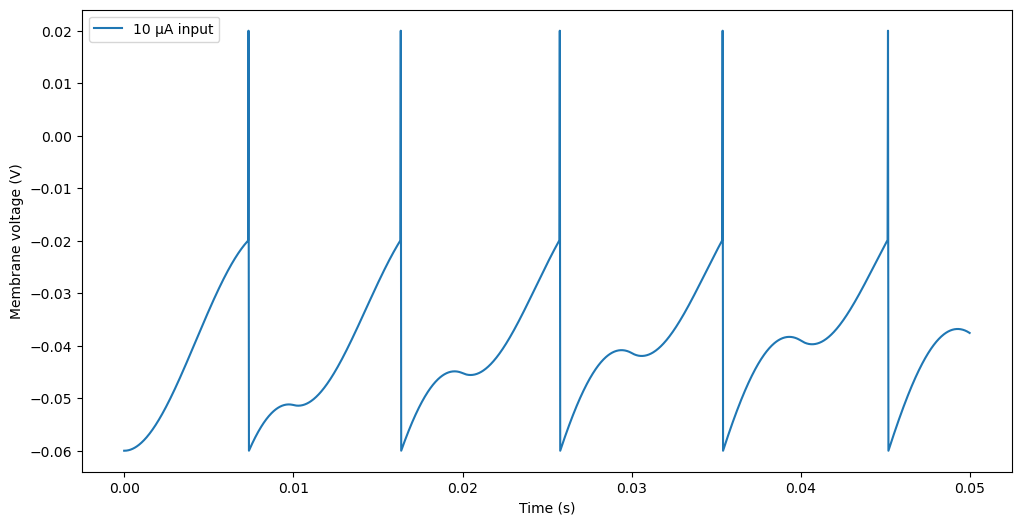

In [10]:
# Plot for 10 µA input
V1 = lif_neuron(Iinput1)
V2 = lif_neuron(Iinput2)
plt.figure(figsize=(12, 6))
plt.plot(t, V1, label='10 µA input')
plt.xlabel('Time (s)')
plt.ylabel('Membrane voltage (V)')
plt.legend()
plt.show()

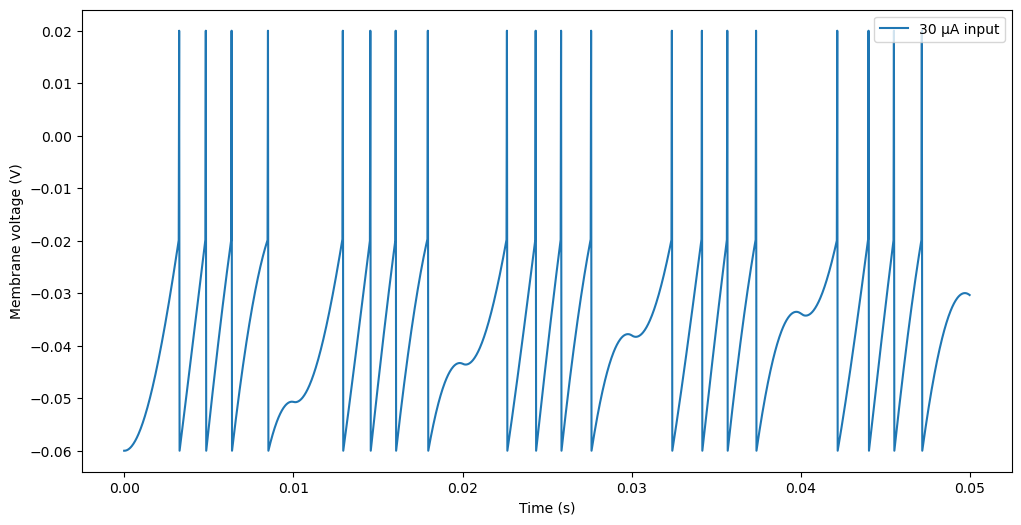

In [11]:
# Plot for 30 µA input
plt.figure(figsize=(12, 6))
plt.plot(t, V2, label='30 µA input')
plt.xlabel('Time (s)')
plt.ylabel('Membrane voltage (V)')
plt.legend()
plt.show()